# Final Project Program Rutvik Rathva 22B4509

### Importing libraries

In [ ]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16      # importing pretrained model vGG16
import gdown                                   # Importing gdown library for downloading files from Google Drive

### Defining the model

In [ ]:
conv_base = VGG16(
    weights='imagenet',                    # Using pre-trained weights
    include_top = False,                   # Excluding the fully connected layers of VGG16
    input_shape=(224,224,3)                # Specifying input shape for the images
)

In [ ]:
conv_base.trainable = True             # Allowing the layers to be trainable


set_trainable = False

for layer in conv_base.layers:
  if layer.name == 'block5_conv1':     # When reaching 'block5_conv1' layer set trainable to true
    set_trainable = True
  if set_trainable:
    layer.trainable = True             #Set the layer to be trainable
  else:
    layer.trainable = False            # Set the layer to be non-trainable

# Display the name and trainability status of each layer in the VGG16 model
for layer in conv_base.layers:
  print(layer.name,layer.trainable)

input_4 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_pool True


In [ ]:
# Dispaly the summary of the VGG16 model
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

#### Build the custom classification model on top of the VGG16 base

In [ ]:
# Build the custom classification model on top of the VGG16 base
model = Sequential()

model.add(conv_base)                       # Adding the VGG16 base
model.add(Flatten())                       # Flattening the output of VGG16
model.add(Dense(256,activation='relu'))    # Adding a fully connected layer with ReLU activation
model.add(Dense(1,activation='sigmoid'))   # Adding the output layer with sigmoid activation

### Loading the data

In [ ]:
# Downloading images dataset from Google Drive using gdown
url = "https://drive.google.com/file/d/1C94gkD_BOACMpXVhtMWBOcPqDD0614ZR/view?usp=drive_link"
output = "images2.zip"
gdown.download(url, output=output, fuzzy=True)

Downloading...
From (original): https://drive.google.com/uc?id=1C94gkD_BOACMpXVhtMWBOcPqDD0614ZR
From (redirected): https://drive.google.com/uc?id=1C94gkD_BOACMpXVhtMWBOcPqDD0614ZR&confirm=t&uuid=6d475137-056a-4fe2-834b-a7f29007b395
To: /content/images2.zip
100%|██████████| 6.45M/6.45M [00:00<00:00, 15.6MB/s]


'images2.zip'

In [ ]:
# Extracting the zip file
!unzip images2.zip

Streaming output truncated to the last 5000 lines.
   creating: ME228_data_small/resize_test_dir/
  inflating: ME228_data_small/resize_test_dir/crack10.jpeg  
  inflating: ME228_data_small/resize_test_dir/crack128.jpeg  
  inflating: ME228_data_small/resize_test_dir/crack132.jpeg  
  inflating: ME228_data_small/resize_test_dir/crack136.jpeg  
  inflating: ME228_data_small/resize_test_dir/crack137.jpeg  
  inflating: ME228_data_small/resize_test_dir/crack139.jpeg  
  inflating: ME228_data_small/resize_test_dir/crack148.jpeg  
  inflating: ME228_data_small/resize_test_dir/crack149.jpeg  
  inflating: ME228_data_small/resize_test_dir/crack151.jpeg  
  inflating: ME228_data_small/resize_test_dir/crack153.jpeg  
  inflating: ME228_data_small/resize_test_dir/crack159.jpeg  
  inflating: ME228_data_small/resize_test_dir/crack160.jpeg  
  inflating: ME228_data_small/resize_test_dir/crack161.jpeg  
  inflating: ME228_data_small/resize_test_dir/crack163.jpeg  
  inflating: ME228_data_small/resiz

In [ ]:
# Loading training and validation datasets using image_dataset_from_directory
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/ME228_data_small/train_final_1',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(224,224)   # resize the input images into 224*224 dimensions
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/ME228_data_small/validation_final_1',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(224,224)    # resize the input images into 224*224 dimensions
)


Found 1400 files belonging to 2 classes.
Found 399 files belonging to 2 classes.


### Processing the images

In [ ]:
# Normalizing the pixel values of image
def process(image,label):
    image = tensorflow.cast(image/255. ,tensorflow.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
# Compiling the model with RMSprop optimizer and binary crossentropy loss
model.compile(
    optimizer=keras.optimizers.RMSprop(learning_rate=1e-4), # Using RMSprop optimizer with a learning rate of 1e-4
    loss='binary_crossentropy',                             # Using binary crossentropy loss for binary classification
    metrics=['accuracy']                                    # Monitoring accuracy during training
)

In [ ]:
# Training the model for 40 epochs with training and validation datasets
history = model.fit(train_ds,epochs=40,validation_data=validation_ds)

Epoch 1/40
44/44 [==============================] - 10s 190ms/step - loss: 0.6849 - accuracy: 0.6357 - val_loss: 0.6867 - val_accuracy: 0.6491
Epoch 2/40
44/44 [==============================] - 9s 202ms/step - loss: 0.2675 - accuracy: 0.8943 - val_loss: 0.2713 - val_accuracy: 0.8897
Epoch 3/40
44/44 [==============================] - 9s 204ms/step - loss: 0.2166 - accuracy: 0.9293 - val_loss: 0.3229 - val_accuracy: 0.8371
Epoch 4/40
44/44 [==============================] - 8s 188ms/step - loss: 0.1121 - accuracy: 0.9607 - val_loss: 0.1543 - val_accuracy: 0.9398
Epoch 5/40
44/44 [==============================] - 9s 207ms/step - loss: 0.1140 - accuracy: 0.9571 - val_loss: 0.2253 - val_accuracy: 0.9173
Epoch 6/40
44/44 [==============================] - 8s 184ms/step - loss: 0.0981 - accuracy: 0.9764 - val_loss: 0.2585 - val_accuracy: 0.9123
Epoch 7/40
44/44 [==============================] - 9s 203ms/step - loss: 0.0702 - accuracy: 0.9743 - val_loss: 0.1332 - val_accuracy: 0.9449
Epoch

### Plotting accuracy vs. epochs for training and validation sets

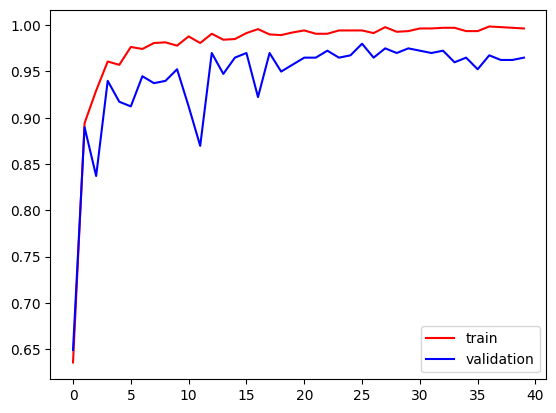

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

### As number of epoches increases train and validation accuracy increases to certain limit.

### Plotting loss vs. epochs for training and validation sets

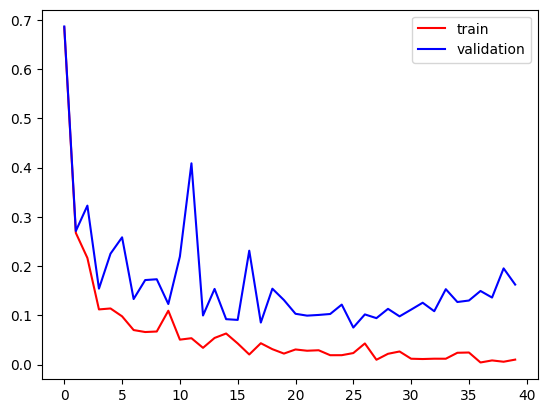

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

### with increase of no. of epoches training and validation decreases.

In [ ]:
# Loading test datasets using image_dataset_from_directory
test_ds = keras.utils.image_dataset_from_directory(
    directory='/content/ME228_data_small/test_final_1',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(224, 224)   # reshape input images into 224*224
)

test_ds = test_ds.map(process)                        # normalizes the pixel values of the images in the test dataset

test_loss, test_accuracy = model.evaluate(test_ds)    # to evalute test loss and accuracy
print("Test Accuracy:", test_accuracy)       # give the test accuracy

Found 200 files belonging to 2 classes.
7/7 [==============================] - 1s 115ms/step - loss: 0.0327 - accuracy: 0.9900
Test Accuracy: 0.9900000095367432


### Building model to train on generated images

In [ ]:
conv_base = VGG16(
    weights='imagenet',          # Using pre-trained weights
    include_top = False,         # Excluding the fully connected layers of VGG16
    input_shape=(224,224,3)      # Specifying input shape for the images

)

In [ ]:
conv_base.trainable = True                         # Allowing the layers to be trainable

set_trainable = False

for layer in conv_base.layers:
  if layer.name == 'block5_conv1':         # When reaching 'block5_conv1' layer set trainable to true
    set_trainable = True
  if set_trainable:
    layer.trainable = True           #Set the layer to be trainable
  else:
    layer.trainable = False       # Set the layer to be non-trainable

# Display the name and trainability status of each layer in the VGG16 model
for layer in conv_base.layers:
  print(layer.name,layer.trainable)

input_2 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_pool True


In [ ]:
# Build the custom classification model on top of the VGG16 base
model = Sequential()

model.add(conv_base)                # Adding the VGG16 base
model.add(Flatten())                # Flattening the output of VGG16
model.add(Dense(256,activation='relu'))                   # Adding a fully connected layer with ReLU activation
model.add(Dense(1,activation='sigmoid'))                  # Adding the output layer with sigmoid activation


### Loading the data

In [ ]:
# Downloading images dataset from Google Drive using gdown library
url = "https://drive.google.com/file/d/1Y7wRQlxlUOBAb3t_IKWjv-8nPxlhvW2Z/view?usp=sharing"
output = "images3.zip"
gdown.download(url, output=output, fuzzy=True)              # Downloading the file

Downloading...
From: https://drive.google.com/uc?id=1Y7wRQlxlUOBAb3t_IKWjv-8nPxlhvW2Z
To: /content/images3.zip
100%|██████████| 1.12M/1.12M [00:00<00:00, 144MB/s]


'images3.zip'

In [ ]:
# Extracting the zip file
!unzip images3.zip

Archive:  images3.zip
   creating: ME228_data_gen_new/test/
   creating: ME228_data_gen_new/test/crack/
  inflating: ME228_data_gen_new/test/crack/crack1.jpeg  
  inflating: ME228_data_gen_new/test/crack/crack10.jpeg  
  inflating: ME228_data_gen_new/test/crack/crack100.jpeg  
  inflating: ME228_data_gen_new/test/crack/crack11.jpeg  
  inflating: ME228_data_gen_new/test/crack/crack12.jpeg  
  inflating: ME228_data_gen_new/test/crack/crack13.jpeg  
  inflating: ME228_data_gen_new/test/crack/crack14.jpeg  
  inflating: ME228_data_gen_new/test/crack/crack15.jpeg  
  inflating: ME228_data_gen_new/test/crack/crack16.jpeg  
  inflating: ME228_data_gen_new/test/crack/crack17.jpeg  
  inflating: ME228_data_gen_new/test/crack/crack18.jpeg  
  inflating: ME228_data_gen_new/test/crack/crack19.jpeg  
  inflating: ME228_data_gen_new/test/crack/crack2.jpeg  
  inflating: ME228_data_gen_new/test/crack/crack20.jpeg  
  inflating: ME228_data_gen_new/test/crack/crack21.jpeg  
  inflating: ME228_data_gen

In [ ]:
# Loading training and validation datasets using image_dataset_from_directory
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/ME228_data_gen_new/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(224,224)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/ME228_data_gen_new/val',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(224,224)
)

Found 1400 files belonging to 2 classes.
Found 400 files belonging to 2 classes.


### Processing the images

In [ ]:
# Normalizing the pixel values of image
def process(image,label):
    image = tensorflow.cast(image/255. ,tensorflow.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
# Compiling the model with RMSprop optimizer and binary crossentropy loss
model.compile(
    optimizer=keras.optimizers.RMSprop(learning_rate=1e-4),    # Using RMSprop optimizer with a learning rate of 1e-4
    loss='binary_crossentropy',    # Using binary crossentropy loss for binary classification
    metrics=['accuracy']           # Monitoring accuracy during training
)

In [ ]:
# Training the model for 40 epochs with training and validation datasets
history = model.fit(train_ds,epochs=40,validation_data=validation_ds)

Epoch 1/40
44/44 [==============================] - 10s 206ms/step - loss: 0.6282 - accuracy: 0.7050 - val_loss: 0.3880 - val_accuracy: 0.8450
Epoch 2/40
44/44 [==============================] - 8s 182ms/step - loss: 0.3229 - accuracy: 0.8636 - val_loss: 0.1611 - val_accuracy: 0.9325
Epoch 3/40
44/44 [==============================] - 9s 204ms/step - loss: 0.1209 - accuracy: 0.9521 - val_loss: 0.0678 - val_accuracy: 0.9650
Epoch 4/40
44/44 [==============================] - 9s 207ms/step - loss: 0.0719 - accuracy: 0.9729 - val_loss: 0.0746 - val_accuracy: 0.9825
Epoch 5/40
44/44 [==============================] - 9s 191ms/step - loss: 0.0338 - accuracy: 0.9914 - val_loss: 0.0282 - val_accuracy: 0.9925
Epoch 6/40
44/44 [==============================] - 9s 207ms/step - loss: 0.0543 - accuracy: 0.9836 - val_loss: 0.0066 - val_accuracy: 1.0000
Epoch 7/40
44/44 [==============================] - 8s 184ms/step - loss: 0.0166 - accuracy: 0.9957 - val_loss: 0.4259 - val_accuracy: 0.8450
Epoch

### Plotting accuracy vs. epochs for training and validation sets for generated images

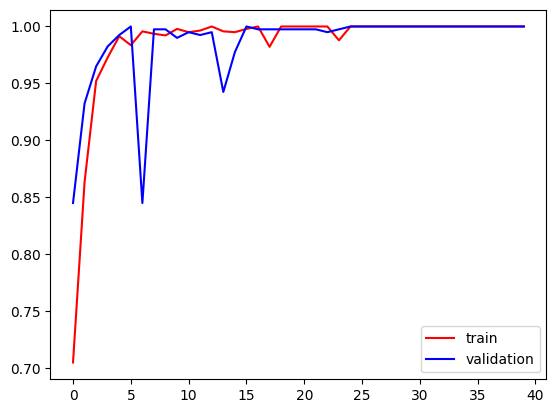

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

### train and validation accuracy increases with no. of epoches

### Plotting loss vs. epochs for training and validation sets for generated images

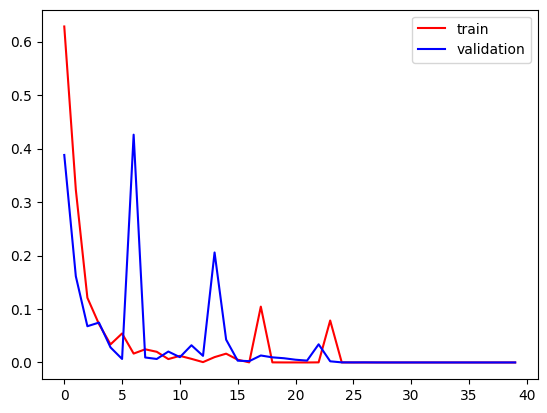

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

### train and validation loss decreases with increas in no. of epoches

In [ ]:
# Loading test datasets using image_dataset_from_directory
test_ds = keras.utils.image_dataset_from_directory(
    directory='/content/ME228_data_gen_new/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(224, 224)
)

test_ds = test_ds.map(process)       # normalizes the pixel values of the images in the test dataset

test_loss, test_accuracy = model.evaluate(test_ds)     # to evalute test loss and accuracy
print("Test Accuracy:", test_accuracy)                 # give test accuracy

Found 200 files belonging to 2 classes.
7/7 [==============================] - 3s 486ms/step - loss: 8.8830 - accuracy: 0.6150
Test Accuracy: 0.6150000095367432


### test accuracy of  GAN generated images is less than original images